# Olist Brazilian E-commerce Public Dataset
-  https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

## Descrição

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

___

## Perguntas para o Projeto
- 📦 Entender as categorias de produtos mais populares
- 🛒 Tempo de Entrega por Estado
- ⏳ Atrasos na entrega afetam as avaliações dos clientes?

___

## Importação de bibliotecas e Visualização inicial dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv("./data/olist_customers_dataset.csv")
orders = pd.read_csv("./data/olist_orders_dataset.csv")
items = pd.read_csv("./data/olist_order_items_dataset.csv")
payments = pd.read_csv("./data/olist_order_payments_dataset.csv")
products = pd.read_csv("./data/olist_products_dataset.csv")
sellers = pd.read_csv("./data/olist_sellers_dataset.csv")
reviews = pd.read_csv("./data/olist_order_reviews_dataset.csv")
category = pd.read_csv("./data/product_category_name_translation.csv")

In [3]:
print("Orders: ")
orders.head()

Orders: 


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
print("Payments: ")
payments.head()

Payments: 


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
print("Products: ")
products.head()

Products: 


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
print("Category: ")
category.head()

Category: 


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


___
## Categorias mais vendidas

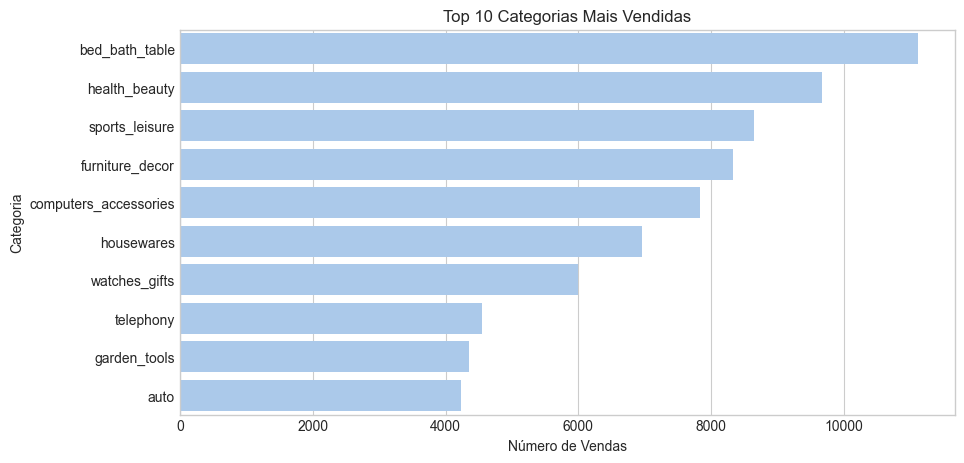

<Figure size 640x480 with 0 Axes>

In [8]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

top_categorias = items.merge(products, on='product_id') \
                      .merge(category, on='product_category_name') \
                      .groupby('product_category_name_english') \
                      .size().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_categorias.values, y=top_categorias.index)
plt.title('Top 10 Categorias Mais Vendidas')
plt.xlabel('Número de Vendas')
plt.ylabel('Categoria')
plt.show()

A análise revelou que as categorias com maior volume de vendas na plataforma são:

- bed_bath_table
- health_beauty
- sports_leisure
- furniture_decor

Essas categorias indicam um forte apelo de produtos voltados ao bem-estar, conforto e estilo de vida, sugerindo que os consumidores da plataforma priorizam itens para o lar, cuidados pessoais e lazer.

Além disso, a variedade nas 10 primeiras posições aponta para um portfólio diversificado de produtos, o que pode ser um fator importante para atrair diferentes perfis de consumidores.

Essa visão é útil para estratégias como:
- Foco em estoque e logística dessas categorias líderes;
- Otimização de campanhas de marketing para produtos mais procurados;
- Potencial de upselling com produtos complementares dentro das categorias mais vendidas.

___
## Analise do tempo de entrega

In [9]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

In [10]:
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

In [11]:
orders_customers = orders.merge(customers, on='customer_id')

In [12]:
avg_delivery = orders_customers.groupby('customer_state')['delivery_time'].mean().sort_values(ascending=False)

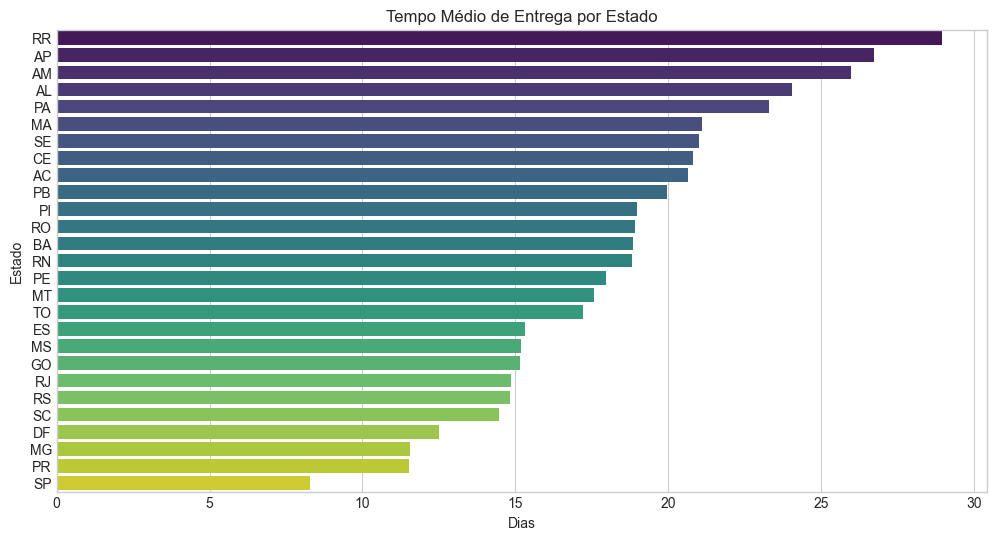

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_delivery.values, y=avg_delivery.index, hue=avg_delivery.index, palette='viridis', legend = False)
plt.title('Tempo Médio de Entrega por Estado')
plt.xlabel('Dias')
plt.ylabel('Estado')
plt.show()

A análise mostra variações significativas no tempo médio de entrega entre os estados brasileiros. Estados mais distantes dos grandes centros logísticos (como o Norte e o Nordeste) tendem a ter prazos mais longos.

Essa informação é crucial para:

- Identificar regiões que exigem melhorias logísticas
- Avaliar o cumprimento de prazos prometidos
- Otimizar centros de distribuição ou parceiros de entrega


___
## Avaliação x Tempo de Entrega

In [14]:
df_avaliacao = orders[['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']] \
    .merge(reviews[['order_id', 'review_score']], on='order_id')

In [15]:
df_avaliacao['order_purchase_timestamp'] = pd.to_datetime(df_avaliacao['order_purchase_timestamp'])
df_avaliacao['order_delivered_customer_date'] = pd.to_datetime(df_avaliacao['order_delivered_customer_date'])
df_avaliacao['order_estimated_delivery_date'] = pd.to_datetime(df_avaliacao['order_estimated_delivery_date'])

In [16]:
df_avaliacao['delivery_time'] = (df_avaliacao['order_delivered_customer_date'] - df_avaliacao['order_purchase_timestamp']).dt.days
df_avaliacao['delivery_delay'] = (df_avaliacao['order_delivered_customer_date'] - df_avaliacao['order_estimated_delivery_date']).dt.days

In [17]:
df_avaliacao = df_avaliacao.dropna()
df_avaliacao = df_avaliacao[df_avaliacao['delivery_time'] > 0]

In [18]:
df_avaliacao['was_late'] = df_avaliacao['delivery_delay'] > 0

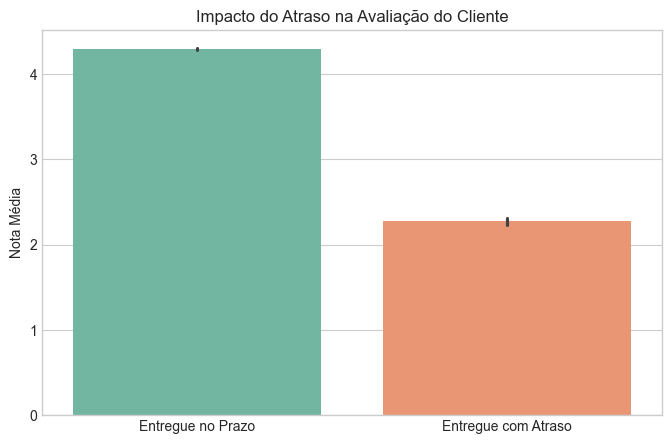

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_avaliacao, x='was_late', y='review_score', hue = 'was_late', palette='Set2', legend = False)
plt.xticks([0, 1], ['Entregue no Prazo', 'Entregue com Atraso'])
plt.title('Impacto do Atraso na Avaliação do Cliente')
plt.ylabel('Nota Média')
plt.xlabel('')
plt.show()

A análise mostra uma clara diferença entre avaliações de pedidos entregues no prazo e pedidos com atraso. Clientes que receberam seus pedidos **com atraso deram, em média, notas menores**, o que reforça a importância da logística no nível de satisfação.

Isso destaca:
- A necessidade de priorizar logística e comunicação com o cliente
- O valor de alertas e estimativas de entrega mais realistas
- A importância de considerar avaliações como KPI de logística

___
## Volume de pedidos por Estado

In [20]:
orders_estado= orders.merge(customers, on='customer_id')

In [21]:
orders_por_estado = orders_estado.groupby('customer_state')['order_id'].count().sort_values(ascending=False)

In [22]:
df_estados = orders_por_estado.reset_index()
df_estados.columns = ['Estado', 'Total de Pedidos']

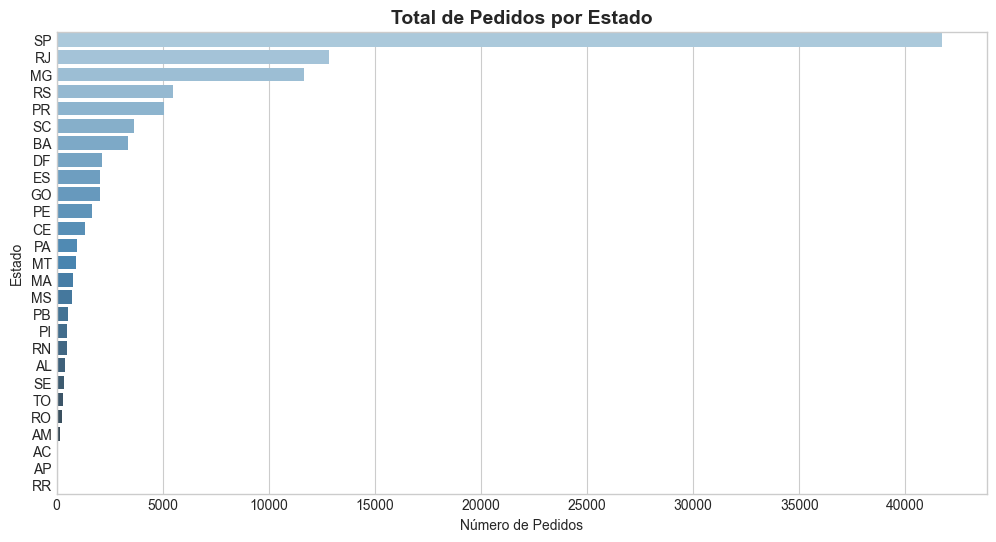

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_estados, x='Total de Pedidos', y='Estado', hue= 'Estado', palette='Blues_d')
plt.title('Total de Pedidos por Estado', fontsize=14, weight='bold')
plt.xlabel('Número de Pedidos')
plt.ylabel('Estado')
plt.show()

A análise mostra que os estados com maior número de pedidos são, principalmente:

- **São Paulo (SP)**
- **Rio de Janeiro (RJ)**
- **Minas Gerais (MG)**

Essa concentração é coerente com a densidade populacional e o poder de consumo dessas regiões.

Ticket Médio = Total de pagamentos / Numero de pedidos

In [24]:
df_ticket = orders.merge(payments, on='order_id') \
                  .merge(customers[['customer_id', 'customer_state']], on='customer_id')

In [25]:
ticket_por_estado = df_ticket.groupby('customer_state').agg({
    'payment_value': 'sum',
    'order_id': 'nunique'
}).reset_index()

In [26]:
ticket_por_estado['ticket_medio'] = ticket_por_estado['payment_value'] / ticket_por_estado['order_id']

In [27]:
ticket_por_estado = ticket_por_estado.sort_values(by='ticket_medio', ascending=False)

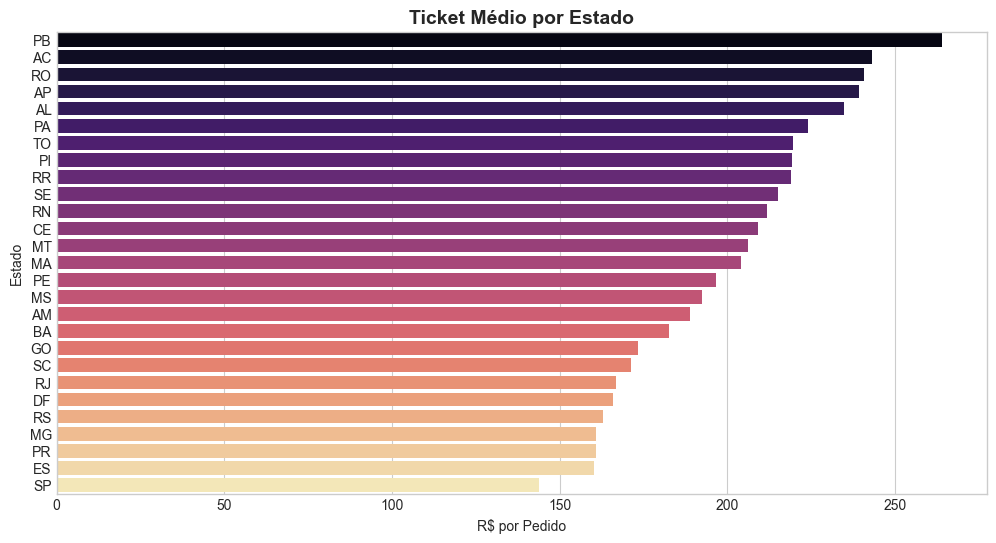

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=ticket_por_estado, x='ticket_medio', y='customer_state', hue='customer_state', palette='magma')
plt.title('Ticket Médio por Estado', fontsize=14, weight='bold')
plt.xlabel('R$ por Pedido')
plt.ylabel('Estado')
plt.show()

A análise revela que alguns estados, apesar de terem menor volume de pedidos, apresentam **ticket médio mais alto**

Isso pode indicar:
- Maior poder aquisitivo em algumas regiões
- Produtos mais caros ou compras em maior quantidade

Já estados como **São Paulo (SP)** e **Minas Gerais (MG)**, apesar do alto volume, têm ticket médio mais estável e amplo alcance.

___
# Conclusão
Este projeto teve como objetivo explorar os dados da Olist, uma plataforma de e-commerce brasileira, com foco em identificar padrões de comportamento dos consumidores e gargalos logísticos. Através das análises realizadas, foi possível responder perguntas relevantes para o negócio:

🔹 📦 Categorias de Produtos Mais Populares<br>
A análise mostrou que categorias como "bed_bath_table", "health_beauty" e "sports_leisure" são líderes em volume de vendas. Isso indica uma forte demanda por produtos voltados ao bem-estar, cuidados pessoais e itens para o lar, segmentos estratégicos para campanhas de marketing e gestão de estoque.

🔹 ⏳ Tempo de Entrega e Avaliação do Cliente<br>
Identificou-se que estados com maior distância dos centros logísticos, como regiões Norte e Nordeste, apresentam tempo médio de entrega significativamente maior. Essa informação é essencial para decisões sobre expansão logística.

🔹 💬 Atrasos na Entrega Afetam as Avaliações?<br>
Sim. Clientes cujos pedidos chegaram com atraso atribuíram notas médias mais baixas, reforçando a correlação negativa entre eficiência logística e satisfação do cliente. O dado sugere que otimizar prazos de entrega pode impactar diretamente na reputação da plataforma.

📌 Considerações Finais<br>
Os insights obtidos fornecem subsídios para:

- Priorizar melhorias logísticas em regiões com alto atraso
- Focar em categorias com maior giro para promoções ou recomendações
- Mapear o impacto do tempo de entrega na experiência do cliente
- Guiar decisões baseadas em dados para aumentar a conversão, retenção e satisfação